In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


In [ ]:
def monte_carlo_simulation(S0, r, sigma, T, num_paths):
    """
    dS = r St dt + sigma * St * dW
    d log S = r - .5 sigma^2 dt + sigma
    """
    dt = T / 365  # Daily time steps
    num_steps = int(T / dt)
    
    # Generate random paths
    paths = np.zeros((num_paths, num_steps + 1))
    
    for i in range(num_paths):
        paths[i, 0] = S0
        for t in range(1, num_steps + 1):
            Z = np.random.normal(0, 1)
            paths[i, t] = paths[i, t - 1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)
    return paths

def plot_paths(paths, T):
    plt.figure(figsize=(10, 6))
    for i in range(paths.shape[0]):
        plt.plot(np.linspace(0, T, paths.shape[1]), paths[i], lw=1)
    plt.title('Monte Carlo Simulated Paths')
    plt.xlabel('Time (years)')
    plt.ylabel('Stock Price')
    plt.grid()
    plt.show()

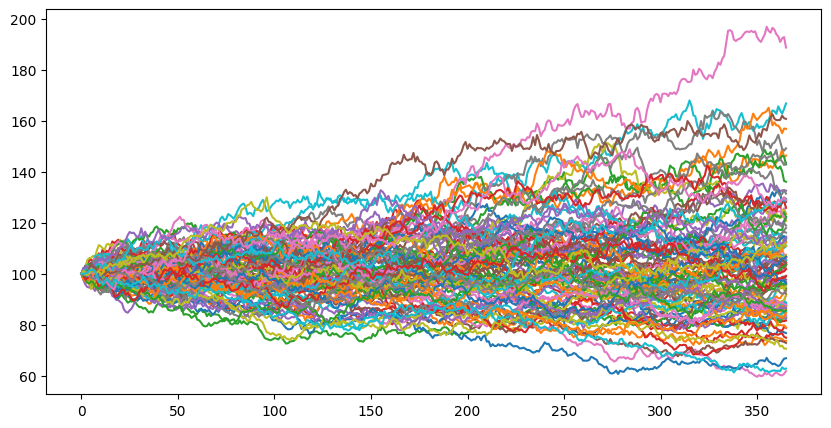

In [32]:
# example usage
if __name__ == "__main__":
    S0 = 100  # Initial stock price
    K = 100   # Strike price
    r = 0.05  # Risk-free rate
    sigma = 0.2  # Volatility
    T = 1     # Time to maturity in years
    num_paths = 100  # Number of simulated paths

    dt = T / 365  # Daily time steps
    num_steps = int(T / dt)
    
    # Generate random paths
    sim_grid = np.zeros((num_paths,num_steps + 1))
    
    for i in range(num_paths):
        sim_grid[i, 0] = S0
        for j in range (1, num_steps + 1):
             Z = np.random.normal(0,1)
             sim_grid[i, j] = sim_grid[i, j-1] * np.exp((r - 0.5 * sigma**2 )* dt + sigma * np.sqrt(dt) * Z)

    plt.figure(figsize=(10,5))

    for i in range(num_paths):
        plt.plot(sim_grid[i])

TypeError: rv_continuous.cdf() missing 1 required positional argument: 'x'